In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:

# Define a list of stock symbols
stock_symbols = [ 'BLK']


In [20]:
data = {}
for symbol in stock_symbols:
    data[symbol] = yf.download(symbol, period="2y", auto_adjust=True)['Close']





[*********************100%%**********************]  1 of 1 completed


In [21]:
data

{'BLK': Date
 2021-10-14    845.204041
 2021-10-15    859.172180
 2021-10-18    848.802612
 2021-10-19    853.859619
 2021-10-20    855.071594
                  ...    
 2023-10-09    643.619995
 2023-10-10    641.950012
 2023-10-11    642.669983
 2023-10-12    636.169983
 2023-10-13    627.659973
 Name: Close, Length: 503, dtype: float64}

In [22]:
# Create a DataFrame with the adjusted close prices
df = pd.DataFrame(data)

# Calculate the daily returns
returns = df.pct_change().dropna()

# Perform K-Means clustering
n_clusters = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(returns)

c:\Users\akram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [23]:
# Get the cluster labels for each stock
cluster_labels = kmeans.labels_

# Create a binary classification target
# For example, classify stocks that belong to cluster 0 as "1" and others as "0"
target = (cluster_labels == 0).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(returns, target, test_size=0.2, random_state=0)


In [24]:
# Create a K-NN classifier
n_neighbors = 5
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test)

In [27]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

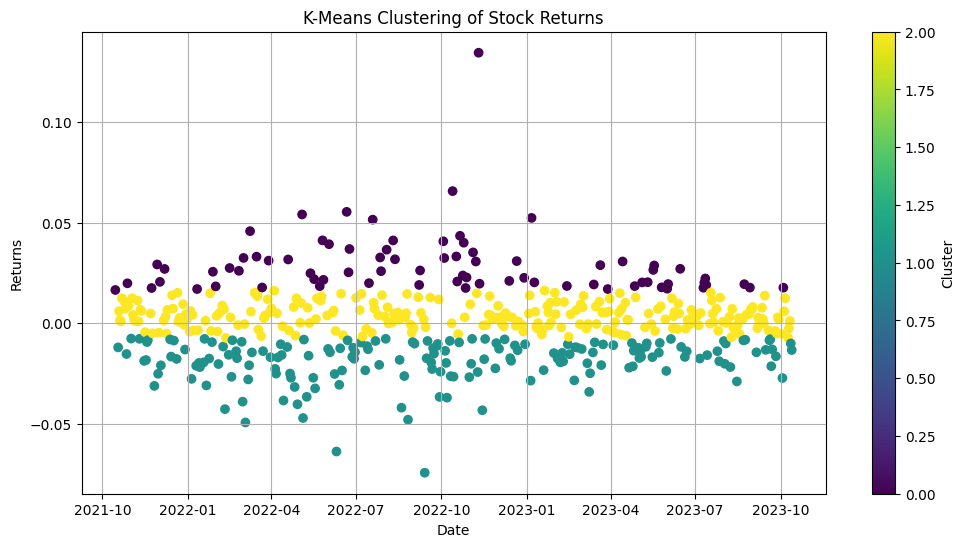

In [25]:
# Visualize the cluster labels
plt.figure(figsize=(12, 6))
plt.scatter(returns.index, returns.iloc[:, 0], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Stock Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

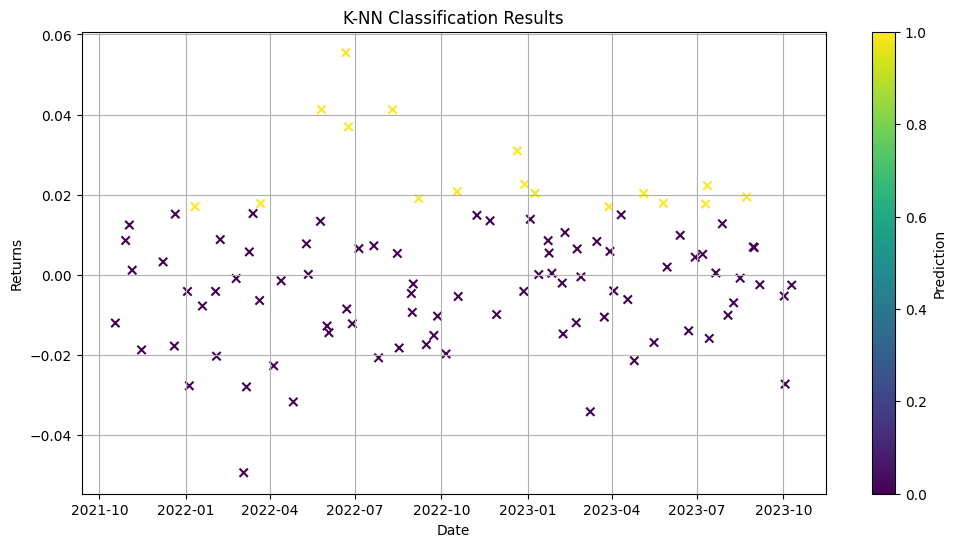

In [26]:
# Visualize the K-NN classification results
plt.figure(figsize=(12, 6))
plt.scatter(X_test.index, X_test.iloc[:, 0], c=predictions, cmap='viridis', marker='x')
plt.title('K-NN Classification Results')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.colorbar(label='Prediction')
plt.grid(True)
plt.show()